In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import mlab
from scipy import signal, stats

In [3]:
url = "https://www.salesanalytics.co.jp/591h"

In [4]:
df = pd.read_csv(
    url, dtype={"Passengers": "float"}, index_col="Month", parse_dates=True
)

In [5]:
df

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<AxesSubplot: xlabel='Month'>

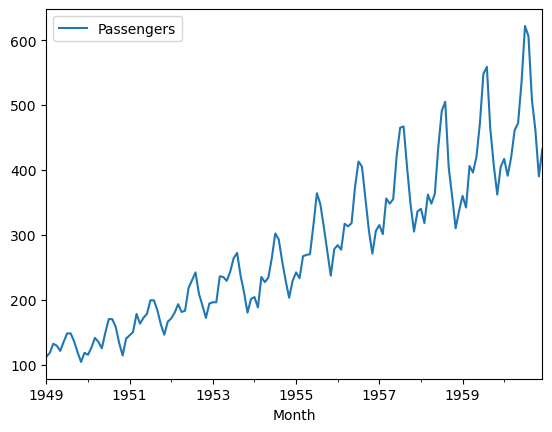

In [6]:
df.plot()

In [7]:
df_std = stats.zscore(df)
df_std

,Passengers
Month,
1949-01-01,-1.407779
1949-02-01,-1.357590
1949-03-01,-1.240483
1949-04-01,-1.265578
1949-05-01,-1.332496
...,...
1960-08-01,2.724417
1960-09-01,1.904669
1960-10-01,1.511525


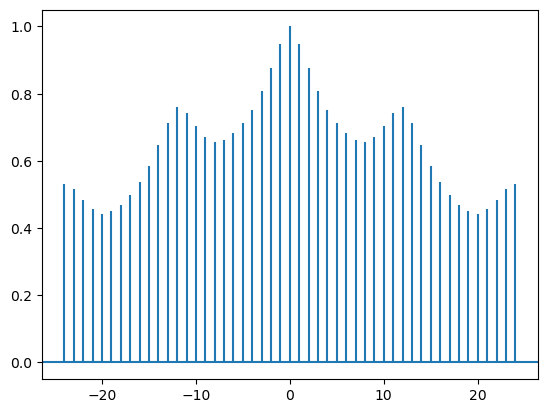

(array([-24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24]),
 array([0.53218983, 0.51712699, 0.48248203, 0.45722376, 0.4416288 ,
        0.44987066, 0.46873401, 0.49974753, 0.53795519, 0.58592342,
        0.64634228, 0.71266087, 0.76039504, 0.74324019, 0.70271992,
        0.67094833, 0.65561048, 0.66290439, 0.6817336 , 0.71376997,
        0.75262542, 0.80668116, 0.87557484, 0.94804734, 1.        ,
        0.94804734, 0.87557484, 0.80668116, 0.75262542, 0.71376997,
        0.6817336 , 0.66290439, 0.65561048, 0.67094833, 0.70271992,
        0.74324019, 0.76039504, 0.71266087, 0.64634228, 0.58592342,
        0.53795519, 0.49974753, 0.46873401, 0.44987066, 0.4416288 ,
        0.45722376, 0.48248203, 0.51712699, 0.53218983]),
 <matplotlib.lines.Line2D at 0x7fc576e6a940>)

In [9]:
acor_value = plt.acorr(df_std["Passengers"], detrend=mlab.detrend_none, maxlags=24)
plt.show()
acor_value

In [10]:
acor_value[0]

array([-24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24])

In [12]:
acor_pd = pd.DataFrame(acor_value[1], acor_value[0])
acor_pd.index.name = "lag"
acor_pd.columns = ["acor"]
acor_pd.head()

,acor
lag,
-24,0.532190
-23,0.517127
-22,0.482482
-21,0.457224
-20,0.441629


,Sales,AD
day,,
2019-01-01,2132000,9.828000e+05
2019-01-02,2596100,7.609000e+05
2019-01-03,2236200,7.184667e+05
2019-01-04,1680900,1.180933e+06
2019-01-05,2155400,9.238000e+05


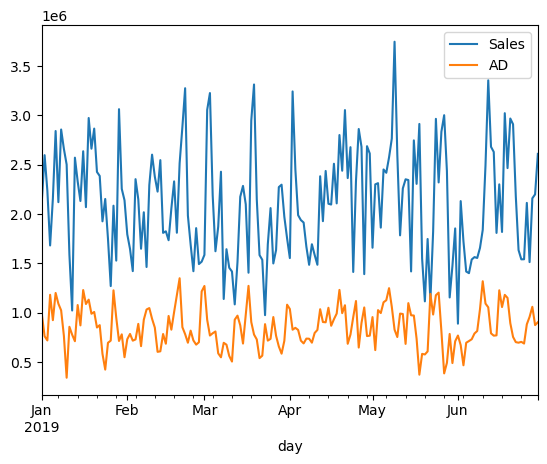

In [14]:
url = "https://www.salesanalytics.co.jp/glrg"
df = pd.read_csv(url, parse_dates=True, index_col="day")
df.plot()
df.head()

In [15]:
df_AD = pd.concat(
    [
        df["AD"],
        df["AD"].shift(1),
        df["AD"].shift(2),
        df["AD"].shift(3),
        df["AD"].shift(4),
        df["AD"].shift(5),
    ],
    axis=1,
)
df_AD.columns = ["AD_lag0", "AD_lag1", "AD_lag2", "AD_lag3", "AD_lag4", "AD_lag5"]
df_AD["Sales"] = df["Sales"]

In [16]:
df_AD.head()

,AD_lag0,AD_lag1,AD_lag2,AD_lag3,AD_lag4,AD_lag5,Sales
day,,,,,,,
2019-01-01,9.828000e+05,NaN,NaN,NaN,NaN,NaN,2132000
2019-01-02,7.609000e+05,9.828000e+05,NaN,NaN,NaN,NaN,2596100
2019-01-03,7.184667e+05,7.609000e+05,982800.0000,NaN,NaN,NaN,2236200
2019-01-04,1.180933e+06,7.184667e+05,760900.0000,982800.0,NaN,NaN,1680900
2019-01-05,9.238000e+05,1.180933e+06,718466.6667,760900.0,982800.0,NaN,2155400


In [18]:
df_AD.corr()["Sales"]

AD_lag0    0.124325
AD_lag1    0.471159
AD_lag2    0.901898
AD_lag3    0.369923
AD_lag4    0.197210
AD_lag5    0.022170
Sales      1.000000
Name: Sales, dtype: float64

In [19]:
df_std = stats.zscore(df)

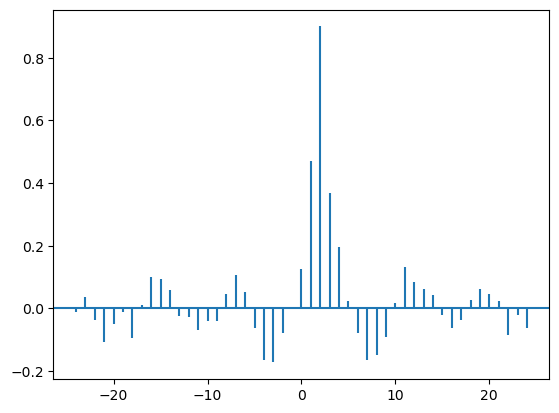

(array([-24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24]),
 array([-0.01163078,  0.03669236, -0.03819846, -0.10694847, -0.04873298,
        -0.01283363, -0.09503614,  0.01190163,  0.10047815,  0.09327332,
         0.05936451, -0.02600833, -0.0266361 , -0.06947164, -0.04147973,
        -0.04059968,  0.04462064,  0.10604745,  0.05373945, -0.06180017,
        -0.16610417, -0.17280277, -0.07813556,  0.00335054,  0.1243253 ,
         0.47108023,  0.8998132 ,  0.3680112 ,  0.19572007,  0.02202618,
        -0.07803782, -0.16430402, -0.14734315, -0.09005371,  0.0164389 ,
         0.13045746,  0.08323746,  0.06100313,  0.04305378, -0.02128511,
        -0.06255835, -0.03668587,  0.02511635,  0.06048186,  0.04685743,
         0.02384662, -0.08352297, -0.02257959, -0.06349122]),
 <

In [22]:
xcor_value = plt.xcorr(
    df_std["Sales"], df_std["AD"], detrend=mlab.detrend_none, maxlags=24
)
plt.show()
xcor_value

In [24]:
xcor_pd = pd.DataFrame(xcor_value[1], xcor_value[0])
xcor_pd.index.name = "lag"
xcor_pd.columns = ["xcor"]
xcor_pd.head()

,xcor
lag,
-24,-0.011631
-23,0.036692
-22,-0.038198
-21,-0.106948
-20,-0.048733
